In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Install FastAI, Gradio, HuggingFace Hub
!pip install fastai gradio huggingface_hub --quiet

from fastai.vision.all import *

# Download dataset
path = untar_data(URLs.PETS)
files = get_image_files(path/'images')

# Define DataLoaders
# The `dls` object is needed for defining the learner's vocabulary
dls = ImageDataLoaders.from_name_re(
    path, files, pat=r'(.+?)_\d+.jpg',
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

# Create learner
learn = vision_learner(dls, models.resnet50, metrics=accuracy)

# Train for 5 epoch
learn.fine_tune(5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 28.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 123MB/s] 


epoch,train_loss,valid_loss,accuracy,time
0,1.410302,0.433448,0.868065,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.423748,0.240643,0.927605,01:18
1,0.355789,0.221939,0.930988,01:22
2,0.237059,0.209010,0.933694,01:21
3,0.144340,0.175579,0.940460,01:20
4,0.093592,0.172533,0.939107,01:20


In [3]:
learn.path = Path('.')
learn.export()

In [4]:
learn = load_learner('export.pkl')

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [5]:
labels = learn.dls.vocab
def predict(img):
    img = PILImage.create(img)
    pred,pred_idx,probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

In [11]:
import gradio as gr

# Assuming 'predict' function is defined and 'learn' is a FastAI learner
# The 'shape' argument is redundant if you're resizing in your 'predict' function
# and typically unnecessary for image inputs unless you need cropping/padding control.
# If you are passing a PIL Image from Gradio to predict, you can simply use:
# inputs=gr.Image(type="pil")

gr.Interface(
    fn=predict,
    # Use the correct, modern syntax for components
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3)
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://b7602b80e9138179b6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [23]:
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"
enable_queue=True

In [19]:
import os

# 1. Define the link to your image and what you want to name it
image_url = "https://raw.githubusercontent.com/sks01dev/Fast.ai-/main/pomerian.jpg"
output_filename = "pomerian.jpg"

# 2. Use the wget command to pull the file directly
# -q makes it quiet, -O specifies the output filename
!wget -O {output_filename} {image_url} -q

# 3. Check if it worked
if os.path.exists(output_filename):
    print(f"✅ Success! '{output_filename}' is in the current directory.")
else:
    print("❌ Download failed. Check your URL.")

✅ Success! 'pomerian.jpg' is in the current directory.


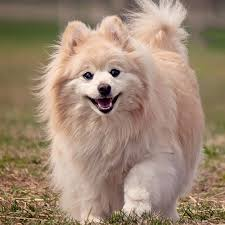

In [20]:
im = Image.open("pomerian.jpg")
im.to_thumb(256, 256)

In [21]:
examples = ["birman.jpg", "pomerian.jpg", "british.jpg"]

In [26]:
gr.Interface(fn=predict,
             inputs=gr.Image(type="pil"),
             outputs=gr.Label(num_top_classes=3),
             title=title,
             description=description,
             article=article,
             examples=examples).launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://976edb198571dbabec.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [36]:
# --- Python File Writing Alternative for app.py ---
app_code = """
import gradio as gr
from fastai.vision.all import *
import os

# --- Model Loading (Assumes model.pkl exists in the root) ---
try:
    learn = load_learner('model.pkl')
except Exception:
    print("Error loading export.pkl. Check file path/existence.")
    raise

labels = learn.dls.vocab

def predict(img):
    img = PILImage.create(img)
    pred, pred_idx, probs = learn.predict(img)
    return {labels[i]: float(probs[i]) for i in range(len(labels))}

# --- Interface Setup ---
examples = ["birman.jpg", "pomerian.jpg", "british.jpg"]
title = "Pet Breed Classifier"
description = "A pet breed classifier trained on the Oxford Pets dataset with fastai. Created as a demo for Gradio and HuggingFace Spaces."
article="<p style='text-align: center'><a href='https://tmabraham.github.io/blog/gradio_hf_spaces_tutorial' target='_blank'>Blog post</a></p>"

demo = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=3),
    title=title,
    description=description,
    article=article,
    examples=examples
)

if __name__ == "__main__":
    demo.launch()
"""

# Write the string content to app.py
with open("app.py", "w") as f:
    f.write(app_code)

print("✅ Created app.py using standard Python.")

✅ Created app.py using standard Python.


In [44]:
# --- Corrected requirements.txt content ---
requirements_content = """
gradio
torch
scikit-image
fastai<2.8.0 # <-- FIX: Forces installation of an older, compatible version
"""

# Write the fixed content to requirements.txt
with open("requirements.txt", "w") as f:
    f.write(requirements_content)

print("✅ Updated requirements.txt to fastai<2.8.0")

✅ Updated requirements.txt to fastai<2.8.0


In [30]:
# Authenticate to Hugging Face
from huggingface_hub import notebook_login, HfApi

# This is still the best way to get the token into the notebook session
notebook_login()

In [45]:
# Define your Space details
SPACE_ID = "sks01dev/Dog_Cat_Classifier"
LOCAL_DIR = "hf_space_clone" # This is the name of the folder created in /kaggle/working/

# --- 1. Clone/Reset Repository ---
from huggingface_hub import Repository
import os 
import time

# Ensure we are in the clean, top-level directory for copying
try:
    os.chdir("/kaggle/working/")
except FileNotFoundError:
    print("Warning: Could not change to /kaggle/working/. Using current directory.")
    pass

!rm -rf {LOCAL_DIR} 
print(f"Cloning {SPACE_ID} into {LOCAL_DIR}...")
repo = Repository(local_dir=LOCAL_DIR, 
                  clone_from=f"https://huggingface.co/spaces/{SPACE_ID}", 
                  repo_type="space", 
                  use_auth_token=True)

# --- 2. Copy Files to the Cloned Folder (Using Correct File Names and Paths) ---

# All source files are in the CWD, so we copy them directly into the target folder {LOCAL_DIR}/
print("\nCopying files into the cloned repository...")

# Copy app and requirements files
!cp app.py {LOCAL_DIR}/
!cp requirements.txt {LOCAL_DIR}/

# ✅ FIX: Copy the local 'export.pkl' file and RENAME it to 'model.pkl' 
# in the destination folder to satisfy app.py
!cp export.pkl {LOCAL_DIR}/model.pkl 

# Copy example images
!cp birman.jpg {LOCAL_DIR}/
!cp british.jpg {LOCAL_DIR}/
!cp pomerian.jpg {LOCAL_DIR}/

# --- 3. Stage, Commit, and Push Changes ---
print("\nCommitting changes...")
os.chdir(LOCAL_DIR) # NOW change to the clone directory

# 1. Add all modified/new files
repo.git_add(pattern="*") 

# 2. Commit the changes. Using a Python function for a robust API call.
repo.git_commit(commit_message="Final successful deployment: added model.pkl (exported learner) and app code.")

# 3. Push the files
print("Pushing files to Hugging Face Space...")
repo.git_push()

# Reset directory back
os.chdir("..") 

print(f"\nDeployment Complete! Your Space should be building successfully at: https://huggingface.co/spaces/{SPACE_ID}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)
Cloning https://huggingface.co/spaces/sks01dev/Dog_Cat_Classifier into local empty directory.


Cloning sks01dev/Dog_Cat_Classifier into hf_space_clone...


Download file model.pkl:   0%|          | 13.9k/98.3M [00:00<?, ?B/s]

Clean file model.pkl:   0%|          | 1.00k/98.3M [00:00<?, ?B/s]


Copying files into the cloned repository...

Committing changes...
Pushing files to Hugging Face Space...


To https://huggingface.co/spaces/sks01dev/Dog_Cat_Classifier
   6107bb4..2b46e36  main -> main




Deployment Complete! Your Space should be building successfully at: https://huggingface.co/spaces/sks01dev/Dog_Cat_Classifier


In [41]:
!ls /kaggle/working/

app.py	    british.jpg  hf_space_clone  requirements.txt
birman.jpg  export.pkl	 pomerian.jpg
